In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact
from os import path

# import plotly.graph_objects as go
import pandas as pd

from quimb import *
import time


ModuleNotFoundError: No module named 'quimb'

In [26]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
        
    return states

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U


In [67]:
Nrep=1
r=2 # local Hilbert space dim

La=4
Lb=4
Lab = La+Lb
Na=r**La
Nb=r**Lb
Nab= Na*Nb

Lc=4
Labc = Lab+Lc

# Npt_sw = [int((La+Lb+Lc)/2)] #np.arange(1,int((La+Lb+Lc)/2)+1)
Npt_sw = [int(Lab/4)] #np.arange(4,int((La+Lb+Lc)/2)+1)

Nc=r**Lc

s_ab=Hilbertspace_Zr(La+Lb,r)
i_ab=[]
i_ab_d=[]
### indices for occupation numbers
for i_r in range(La+Lb+1):
    i_ab.append(np.argwhere(np.sum(s_ab,axis=1)==i_r)[:,0])

#     for i_d in range(-Lb,La+1):
#         i_ab_d.append(np.argwhere((np.sum(s_ab[:,:La],axis=1)-np.sum(s_ab[:,La:],axis=1))==i_d)[:,0])      
#     s_c=Hilbertspace_Zr(Lc,r)
#     i_c=[]
#     for i_r in range(Lc+1):
#         i_c.append(np.argwhere(np.sum(s_c,axis=1)==i_r)[:,0]) 
        
v0T=np.zeros(Nrep*Nb*Na)

neg_ab = np.zeros((len(Npt_sw),Nrep))
neg_ac = np.zeros((len(Npt_sw),Nrep))
mut_ac = np.zeros((len(Npt_sw),Nrep))
neg_ab_2 = np.zeros((len(Npt_sw),Nrep))

t_timer= time.time()
for i_N in range(len(Npt_sw)):
    Npt=Npt_sw[i_N]
    print(Npt)

    X=np.zeros((Na*Nb,Nc), dtype=np.complex128)
    
    v1T =[]
    for i_r in range(Nrep):
#         print(i_r)
#         for i_pt in range(min(Npt,La+Lb)+1):
#             if (Npt-i_pt) <= Lc:
#                     print(i_ab[i_pt],i_c[Npt-i_pt])
#                 X[np.ix_(i_ab[i_pt],i_c[Npt-i_pt])]=np.random.randn(len(i_ab[i_pt]),len(i_c[Npt-i_pt]))+ 1j*np.random.randn(len(i_ab[i_pt]),len(i_c[Npt-i_pt]))
    #### no symmetry
#         X=np.random.randn(Na*Nb,Nc)+1j*np.random.randn(Na*Nb,Nc)
        X[np.ix_(i_ab[Npt]),:]=np.random.randn(len(i_ab[Npt]),Nc)+ 1j*np.random.randn(len(i_ab[Npt]),Nc)

        psi = normalize(np.reshape(X,[Nab*Nc,1]))
        dims = [r]*Labc
#         neg_ab[i_N,i_r] = logneg_subsys_approx(psi, dims=dims, sysa=np.arange(Lc,Lc+La), sysb=np.arange(Lc+La,Labc))
#         neg_ab[i_N,i_r] = logneg_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,La+Lb))
        neg_ac[i_N,i_r] = logneg_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La+Lb,Labc))
        mut_ac[i_N,i_r] = mutinf_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La+Lb,Labc))

#         mat=np.dot(X,np.matrix(X).H)
#         rho= mat / np.trace(mat)
#         neg_ab_2[i_N,i_r]= logneg(rho, dims=[r]*(Lab), sysa=range(La))

    print(neg_ac, mut_ac)
#     out_dir = 'Hong_data/' 
#     if symm==1:
#         f1= 'NS_U1_%d_Labc_%d_%d_%d_symm.npz' % (Npt,La,Lb,Lc)
#     else:
#         f1= 'NS_U1_%d_Labc_%d_%d_%d.npz' % (Npt,La,Lb,Lc)
#     print(f1+' was saved!')
#     fname = out_dir+f1
#     np.savez(fname, evals=v1T, Nrep=Nrep)

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")


2
[[1.62647286]] [[3.55062415]]
Finished, elapsed time = 0.01 sec


In [24]:
Nrep=10
r=2 # local Hilbert space dim

Na1=4
La1=r**Na1
Na2=2 #Na1
La2=r**Na2

Nb_sw = np.arange(4,10)
neg_a1a2 = np.zeros((len(Nb_sw),Nrep))
mut_a1a2 = np.zeros((len(Nb_sw),Nrep))

t_timer= time.time()
for i_b in range(len(Nb_sw)):
    Nb = Nb_sw[i_b]
    Lb=r**Nb
    Nab = Na1 + Na2 + Nb
    Lab = r**Nab
    
    Na1b = Na1+Nb
    La1b= La1*Lb
    Npt=np.round(Na1b/4)
    print("Na1b=", Na1b, ", Npt=", Npt)

    s_a1b=Hilbertspace_Zr(Na1b,r)
    ### indices for occupation numbers
    i_a1b = np.argwhere(np.sum(s_a1b,axis=1)==Npt)[:,0]
    
    X=np.zeros((La1b,La2), dtype=np.complex128)
    
    for i_r in range(Nrep):
#         print(i_r)
        X[np.ix_(i_a1b),:]=np.random.randn(len(i_a1b),La2)+ 1j*np.random.randn(len(i_a1b),La2)
    #### no symmetry
#         X=np.random.randn(Na*Nb,Nc)+1j*np.random.randn(Na*Nb,Nc)

        psi = normalize(np.reshape(X,[Lab,1]))
        dims = [r]*Nab
        neg_a1a2[i_b,i_r] = logneg_subsys_approx(psi, dims=dims, sysa=np.arange(Na1), sysb=np.arange(Na1b,Nab))
        mut_a1a2[i_b,i_r] = mutinf_subsys(psi, dims=dims, sysa=np.arange(Na1), sysb=np.arange(Na1b,Nab))

#     print(neg_a1a2, mut_a1a2)
    
#     out_dir = 'Hong_data/' 
#     if symm==1:
#         f1= 'NS_U1_%d_Labc_%d_%d_%d_symm.npz' % (Npt,La,Lb,Lc)
#     else:
#         f1= 'NS_U1_%d_Labc_%d_%d_%d.npz' % (Npt,La,Lb,Lc)
#     print(f1+' was saved!')
#     fname = out_dir+f1
#     np.savez(fname, evals=v1T, Nrep=Nrep)

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")


Na1b= 8 , Npt= 2.0
Na1b= 9 , Npt= 2.0
Na1b= 10 , Npt= 2.0
Na1b= 11 , Npt= 3.0
Na1b= 12 , Npt= 3.0
Na1b= 13 , Npt= 3.0
Finished, elapsed time = 46.52 sec


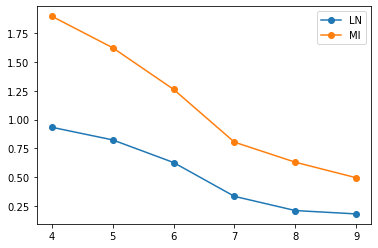

In [25]:
plt.plot(Nb_sw, np.mean(neg_a1a2,axis=1), "o-",label="LN")
plt.plot(Nb_sw, np.mean(mut_a1a2,axis=1), "o-",label="MI")
plt.legend()
plt.show()

# negativity spectrum

In [68]:
Nrep=400
r=2 # local Hilbert space dim

La=4
Lb=10
Lab = La+Lb
Na=r**La
Nb=r**Lb
Nab= Na*Nb

Lc=4
Labc = Lab+Lc

# Npt_sw = [int((La+Lb+Lc)/2)] #np.arange(1,int((La+Lb+Lc)/2)+1)
Npt_sw = [int(Lab/2)] #np.arange(4,int((La+Lb+Lc)/2)+1)

Nc=r**Lc

s_ab=Hilbertspace_Zr(La+Lb,r)
i_ab=[]
i_ab_d=[]
### indices for occupation numbers
for i_r in range(La+Lb+1):
    i_ab.append(np.argwhere(np.sum(s_ab,axis=1)==i_r)[:,0])

v0T=np.zeros(Nrep*Nb*Na)

neg_ab = np.zeros((len(Npt_sw),Nrep))
neg_ac = np.zeros((len(Npt_sw),Nrep))
mut_ac = np.zeros((len(Npt_sw),Nrep))
neg_ac_2 = np.zeros((len(Npt_sw),Nrep))

v1T=np.zeros(Nrep*Nc*Na)

t_timer= time.time()
for i_N in range(len(Npt_sw)):
    Npt=Npt_sw[i_N]
    print(Npt)

    X=np.zeros((Na*Nb,Nc), dtype=np.complex128)
    
    for i_r in range(Nrep):
        X[np.ix_(i_ab[Npt]),:]=np.random.randn(len(i_ab[Npt]),Nc)+ 1j*np.random.randn(len(i_ab[Npt]),Nc)

        psi = normalize(np.reshape(X,[Nab*Nc,1]))
        dims = [r]*Labc
#         neg_ac[i_N,i_r] = logneg_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La+Lb,Labc))
#         mut_ac[i_N,i_r] = mutinf_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La+Lb,Labc))
        
        rho = partial_trace(psi, dims = dims, keep=np.concatenate((np.arange(La),np.arange(La+Lb,Labc))))
#         neg_ac_2[i_N,i_r]= logneg(rho, dims=[r]*(La+Lc), sysa=range(La))
    
        rT2 = p_transpose_2(rho,Na,Nc)
        l1T=np.linalg.eigvalsh(rT2)
#         print(np.log2(np.sum(np.abs(l1T))))
        Nab_r = len(i_ab[Npt]) # size of sub-Hilbert space
        v1T[i_r*Nc*Na:(i_r+1)*Nc*Na] = Nab_r *l1T

        
#     print(neg_ac, neg_ac_2)
#     out_dir = 'Hong_data/' 
#     if symm==1:
#         f1= 'NS_U1_%d_Labc_%d_%d_%d_symm.npz' % (Npt,La,Lb,Lc)
#     else:
#         f1= 'NS_U1_%d_Labc_%d_%d_%d.npz' % (Npt,La,Lb,Lc)
#     print(f1+' was saved!')
#     fname = out_dir+f1
#     np.savez(fname, evals=v1T, Nrep=Nrep)

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")


7
Finished, elapsed time = 12.35 sec


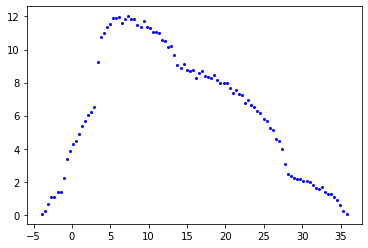

In [69]:
num_bins = 100
n, bin_edges = np.histogram(v1T, bins=num_bins)
bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
#     print(np.sum(n)/Nrep-Nab_r-N0)
n= n/Nrep/(bin_edges[1]-bin_edges[0])            
#     plt.plot(bins_center,n,'o',markersize=2,color='b' , label=r'$G_2, N_{pt}$=%d' % (i_pt))
plt.plot(bins_center,n,'o',markersize=2,color='b' , label=r'$P_2$')
# plt.ylim([0,40])
plt.show()